In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def createGraphs(xVec, yVecs, legendLabels, title, xLabel, yLabel, fileName=None):
    """
    xVec        : List containing the x-values for our plot
    yVecs       : List of Lists that contain the different items we want to plot
    legendLabels: List of labels for the graph. Must be the same length as yVecs.
    title       : Title of the plot
    xLabel      : Label for the x-axis
    yLabel      : Label for the y-axis
    fileName    : Name of the file we want to save to. If None, then we do not 
        save to a file and instead just display.
    """
    if(len(yVecs) != len(legendLabels)):
        print("yVecs and legendLabels do not have the same length")
        return
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    numYVecs = len(yVecs)
    for i in range(numYVecs):
        ax.plot(xVec, yVecs[i], label=legendLabels[i])
    ax.legend()
    fig.show()
    if (fileName != None):
        fig.savefig(fileName)

def createGraphs2(xVec, yVecs, legendLabels, title, xLabel, yLabel, fileName=None, yticks=None, colors=None):
    """
    xVec        : List containing the x-values for our plot
    yVecs       : List of Lists that contain the different items we want to plot
                    yVecs[i] is a list of experiments ran for one function call
                    yVecs[i,j] is a list of outputs of one experiment at xVec[j]
                    yVecs[i,j,k] is an instantiation of an experiment
    legendLabels: List of labels for the graph. Must be the same length as yVecs.
    title       : Title of the plot
    xLabel      : Label for the x-axis
    yLabel      : Label for the y-axis
    fileName    : Name of the file we want to save to. If None, then we do not 
        save to a file and instead just display.
    """
    if(len(yVecs) != len(legendLabels)):
        print("yVecs and legendLabels do not have the same length")
        return
    if(colors == None):
        #colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        colors = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']
    fig,ax = plt.subplots()
    ax.set_title(title)
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    
    numYVecs = len(yVecs)
    for i in range(numYVecs):
        # Generate quantile information
        lowQ = []
        highQ= []
        med  = []
        for j in range(len(xVec)):
            lowQ.append(np.quantile(yVecs[i][j], .25))
            highQ.append(np.quantile(yVecs[i][j], .75))
            med.append(np.quantile(yVecs[i][j], .5))
        ax.plot(xVec, lowQ, '--', color=colors[i])
        ax.plot(xVec, highQ, '--', color=colors[i])
        ax.plot(xVec, med, color=colors[i], label=legendLabels[i])
    ax.legend()
    if (yticks != None):
        plt.yticks(yticks)
    fig.show()
    if (fileName != None):
        fig.savefig(fileName)

In [4]:
def computePerfK(index, m, n, time):
    if (index == 0 or index == 1):
        ret = 12*m*n**2 - 6*m*n - 4*n**3 + 9*n**2 - 11*n
        ret = ret / 6
    elif (index == 2):
        ret = 2*m*n**2 + n**2 - n
        ret = ret / 2
    return ret / (1.0e+9 * time)

10


/tmp/ipykernel_34405/664932449.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_34405/664932449.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


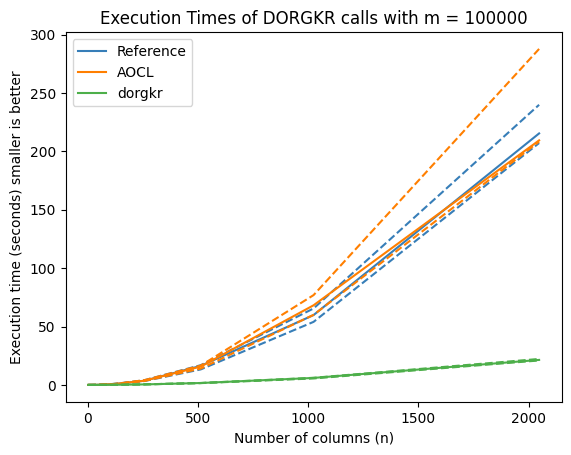

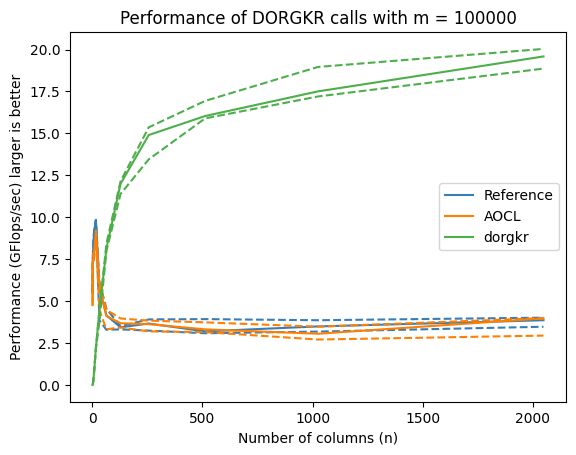

In [5]:
file = open("dorgkr_timing.16.April.2024.txt")
lines = file.readlines()
m = 100000
nVec = []
optTime = []
refTime = []
kTime = []
# Currently these are computed not read. Will be fixed later
optFlop = []
refFlop = []
kFlop = []

timeVecs = [refTime, optTime, kTime]
flopVecs = [refFlop, optFlop, kFlop]
labelVec = ["Reference", "AOCL", "dorgkr"]

for j in range(len(lines)):
    line = lines[j]
    if (line[0] == 'T'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'n'):
        n = int(line[2:])
        nVec.append(n)
        index = -1
        continue
    lineVec = line.split(":")
    source = lineVec[0]
    if (source == 'k'):
        index = 2
    elif (source == 'a'):
        index = 1
    elif (source == 'r'):
        index = 0
    value = float(lineVec[1])
    if (value == 0):
        continue
    if (len(nVec) > len(timeVecs[index])):
        timeVecs[index].append([value])
    else:
        timeVecs[index][-1].append(value)
    time = value
    value = computePerfK(index, m, n, time)
    if (len(nVec) > len(flopVecs[index])):
        flopVecs[index].append([value])
    else:
        flopVecs[index][-1].append(value)
print(len(timeVecs[0][0]))
createGraphs2(nVec, timeVecs, labelVec, "Execution Times of DORGKR calls with m = 100000", "Number of columns (n)", "Execution time (seconds) smaller is better", "timeDORGKR.pdf")
createGraphs2(nVec, flopVecs, labelVec, "Performance of DORGKR calls with m = 100000", "Number of columns (n)", "Performance (GFlops/sec) larger is better", "flopDORGKR.pdf")

In [6]:
def computePerfT(index, m, time, n=32):
    if (index == 0 or index == 1):
        ret = 6*m*n**2 - 6*m*n - 4*n**3 + 6*n**2 - 2*n
        ret = ret / 6
    elif (index == 2):
        ret = 6*m*n**2 - 6*m*n - 2*n**3 + 3*n**2 - n
        ret = ret / 6
    elif (index == 3):
        ret = 6*m*n**2 + 6*m*n + 4*n**3 - 9*n**2 + 5*n
        ret = ret / 6
    
    return ret / (1.0e+9 * time)

/tmp/ipykernel_34405/664932449.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_34405/664932449.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_34405/664932449.py:70: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


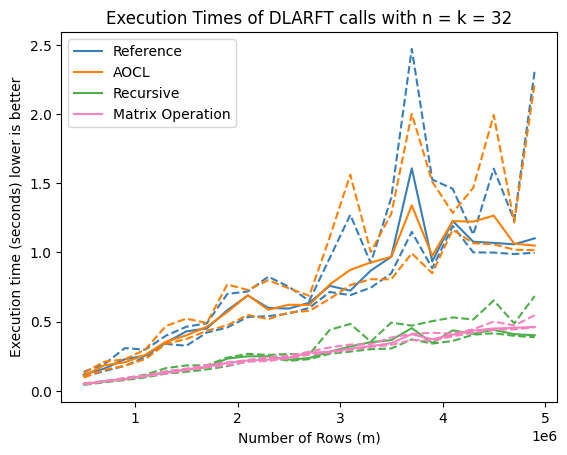

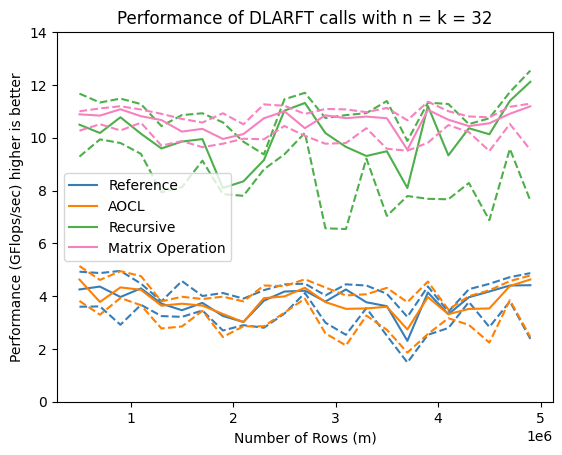

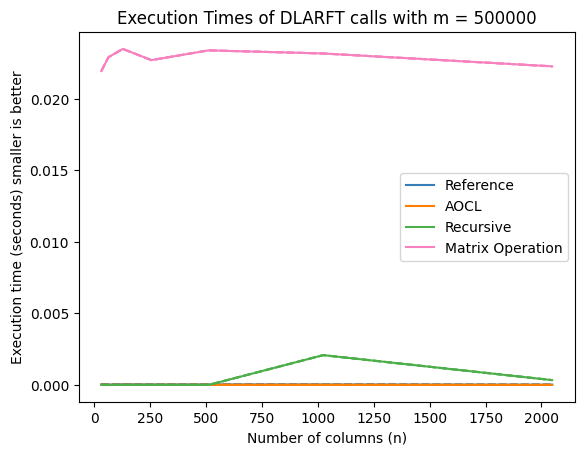

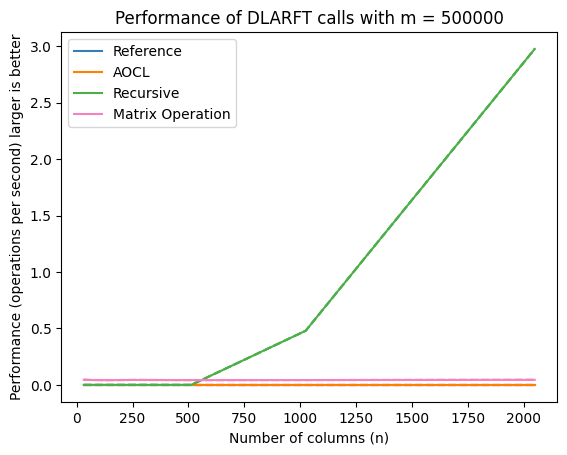

In [7]:
# Now, we parse the dlarft_timing.$(date).txt files
file = open("dlarft_timing.16.April.2024.txt")
lines = file.readlines()
mVec = []

optTime = []
refTime = []
recTime = []
utTime = []
# Currently these are computed not read. Will be fixed later
optFlop = []
refFlop = []
recFlop = []
utFlop = []

timeVecs = [refTime, optTime, recTime, utTime]
flopVecs = [refFlop, optFlop, recFlop, utFlop]
labelVec = ["Reference", "AOCL", "Recursive", "Matrix Operation"]
for i in range(len(lines)):
    line = lines[i]
    if (line[0] == 'T'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'm'):
        m = int(line[2:])
        mVec.append(m)
        index = -1
        continue
    if (line[0] == 'n'):
        break
    if (line == "reference DLARFT\n"):
        index = 0
    elif (line == "optimized DLARFT\n"):
        index = 1
    elif (line == "MY_DLARFT_REC\n"):
        index = 2
    elif (line == "MY_DLARFT_UT\n"):
        index = 3
    else:
        lineVec = line.split(":")
        try:
            value = float(lineVec[1])
        except:
            print(lineVec)
            print(line)
        if (lineVec[0] == "time"):
            if (len(mVec) > len(timeVecs[index])):
                timeVecs[index].append([value])
            else:
                timeVecs[index][-1].append(value)
            time = value
            value = computePerfT(index, m, time)
            if (len(mVec) > len(flopVecs[index])):
                flopVecs[index].append([value])
            else:
                flopVecs[index][-1].append(value)
# Create graphs
createGraphs2(mVec, timeVecs, labelVec, "Execution Times of DLARFT calls with n = k = 32", "Number of Rows (m)", "Execution time (seconds) lower is better", "timeDLARFT.pdf")
createGraphs2(mVec, flopVecs, labelVec, "Performance of DLARFT calls with n = k = 32", "Number of Rows (m)", "Performance (GFlops/sec) higher is better", "flopDLARFT.pdf", yticks=[0, 2, 4, 6, 8, 10, 12, 14])

m = 500000
nVec = []
optTime = []
refTime = []
recTime = []
utTime = []
# Currently these are computed not read. Will be fixed later
optFlop = []
refFlop = []
recFlop = []
utFlop = []

timeVecs = [refTime, optTime, recTime, utTime]
flopVecs = [refFlop, optFlop, recFlop, utFlop]
for j in range(i, len(lines)):
    line = lines[j]
    if (line[0] == 'T'):
        # Skip over a line that is used to make visual inspection easier
        continue
    if (line[0] == 'n'):
        n = int(line[2:])
        if (n < 32):
            continue
        nVec.append(n)
        index = -1
        continue
    if (line == "reference DLARFT\n"):
        index = 0
    elif (line == "optimized DLARFT\n"):
        index = 1
    elif (line == "MY_DLARFT_REC\n"):
        index = 2
    elif (line == "MY_DLARFT_UT\n"):
        index = 3
    else:
        lineVec = line.split(":")
        value = float(lineVec[1])
        if (value == 0):
            continue
        if (lineVec[0] == "time"):
            if (len(mVec) > len(timeVecs[index])):
                timeVecs[index].append([value])
            else:
                timeVecs[index][-1].append(value)
            time = value
            value = computePerfT(index, m, time, n)
            if (len(mVec) > len(flopVecs[index])):
                flopVecs[index].append([value])
            else:
                flopVecs[index][-1].append(value)
createGraphs2(nVec, timeVecs, labelVec, "Execution Times of DLARFT calls with m = 500000", "Number of columns (n)", "Execution time (seconds) smaller is better")
createGraphs2(nVec, flopVecs, labelVec, "Performance of DLARFT calls with m = 500000", "Number of columns (n)", "Performance (operations per second) larger is better")

In [ ]:
# This notebook/script is responsible for parsing the times_v*.txt files.

#version1File = open("times_v1.txt")
file = open("coarseResults1.txt")
lines = file.readlines()
nVec = []
kVec = []
aocl=False
version0=False
version1=False
version2=False
version3=False
aoclTime = []
v0Time = []
v1Time = []
v2Time = []
v3Time = []
aoclFlop = []
v0Flop = []
v1Flop = []
v2Flop = []
v3Flop = []
oldM = 0
for line in lines:
    if(line[0] =='T'):
        continue
    if(line[0]=='S'):
        createGraphs(aoclFlop, v0Flop, v1Flop, v2Flop, v3Flop, kVec, "AOCL vs MY_DORGQR versions. m={},n=k".format(oldM), "Number of reflectors (k)", "GFlops/sec (higher is better)", "RectPerf_m={}.png".format(oldM))
        createGraphs(aoclTime, v0Time, v1Time, v2Time, v3Time, kVec, "AOCL vs MY_DORGQR versions. m={},n=k".format(oldM), "Number of reflectors (k)", "Execution time (lower is better)", "RectTime_m={}.png".format(oldM))
        break
    if(line[1]=='='):
        lineVec = line.split()
        tmp = int(lineVec[0][2:])
        if(oldM == 0):
            oldM = tmp
        if(oldM != tmp):
            createGraphs(aoclFlop, v0Flop, v1Flop, v2Flop, v3Flop, kVec, "AOCL vs MY_DORGQR versions. m={},n=k".format(oldM), "Number of reflectors (k)", "GFlops/sec (higher is better)", "coarseImage_RectPerf_m={}.png".format(oldM))
            createGraphs(aoclTime, v0Time, v1Time, v2Time, v3Time, kVec, "AOCL vs MY_DORGQR versions. m={},n=k".format(oldM), "Number of reflectors (k)", "Execution time (lower is better)", "coarseImage_RectTime_m={}.png".format(oldM))
            nVec = []
            kVec = []
            aocl=False
            version1=False
            version2=False
            version3=False
            aoclTime = []
            v0Time = []
            v1Time = []
            v2Time = []
            v3Time = []
            aoclFlop = []
            v0Flop = []
            v1Flop = []
            v2Flop = []
            v3Flop = []
            oldM=tmp
        m = tmp
        n = int(lineVec[1][2:])
        k = int(lineVec[2][2:])
        nVec.append(n)
        kVec.append(k)
        continue
    if(line[0]=='A'):
        aocl=True
        version0=False
        version1=False
        version2=False
        version3=False
        continue
    if(line[1]=='y'):
        lineVec = line.split()
        vNum=lineVec[0][-1]
        if(vNum=='0'):
            version0=True
            version1=False
            version2=False
            version3=False
            aocl=False
        if(vNum=='1'):
            version1=True
            version0=False
            version2=False
            version3=False
            aocl=False
        elif(vNum=='2'):
            version2=True
            version0=False
            version1=False
            version3=False
            aocl=False
        elif(vNum=='3'):
            version3=True
            version0=False
            version1=False
            version2=False
            aocl=False
        continue
    # reaching here means that we are in a line of the form executionTime:GFlops/sec
    lineVec = line.split(':')
    try:
        tmpFlop = float(lineVec[1])
        tmpTime = float(lineVec[0])
    except:
        print(line)
        continue
    if(aocl):
        if(len(kVec)!=len(aoclFlop)):
            aoclFlop.append(tmpFlop)
            aoclTime.append(tmpTime)
        else:
            if(aoclFlop[-1] < tmpFlop):
                aoclFlop[-1] = tmpFlop
                aoclTime[-1] = tmpTime
    elif(version0):
        if(len(kVec)!=len(v0Flop)):
            v0Flop.append(tmpFlop)
            v0Time.append(tmpTime)
        else:
            if(v0Flop[-1] < tmpFlop):
                v0Flop[-1] = tmpFlop
                v0Time[-1] = tmpTime
    elif(version1):
        if(len(kVec)!=len(v1Flop)):
            v1Flop.append(tmpFlop)
            v1Time.append(tmpTime)
        else:
            if(v1Flop[-1] < tmpFlop):
                v1Flop[-1] = tmpFlop
                v1Time[-1] = tmpTime
    elif(version2):
        if(len(kVec)!=len(v2Flop)):
            v2Flop.append(tmpFlop)
            v2Time.append(tmpTime)
        else:
            if(v2Flop[-1] < tmpFlop):
                v2Flop[-1] = tmpFlop
                v2Time[-1] = tmpTime
    elif(version3):
        if(len(kVec)!=len(v3Flop)):
            v3Flop.append(tmpFlop)
            v3Time.append(tmpTime)
        else:
            if(v3Flop[-1] < tmpFlop):
                v3Flop[-1] = tmpFlop
                v3Time[-1] = tmpTime
nVec = []
kVec = []
aocl=False
version0=False
version1=False
version2=False
version3=False
aoclTime = []
v0Time = []
v1Time = []
v2Time = []
v3Time = []
aoclFlop = []
v0Flop = []
v1Flop = []
v2Flop = []
v3Flop = []
oldM=0
reachedSquare=False
for line in lines:
    if(line[0]!='S' and not reachedSquare):
        continue
    elif(line[0]=='S'):
        reachedSquare=True
        continue
    if(line[1]=='='):
        lineVec = line.split()
        tmp = int(lineVec[0][2:])
        if(oldM == 0):
            oldM = tmp
        if(oldM != tmp):
            createGraphs(aoclFlop, v0Flop, v1Flop, v2Flop, v3Flop, kVec, "AOCL vs MY_DORGQR versions. m=n={}".format(oldM), "Number of reflectors (k)", "GFlops/sec (higher is better)", "SquarePerf_m={}.png".format(oldM))
            createGraphs(aoclTime, v0Time, v1Time, v2Time, v3Time, kVec, "AOCL vs MY_DORGQR versions. m=n={}".format(oldM), "Number of reflectors (k)", "Execution time (lower is better)", "coarseImage_SquareTime_m={}.png".format(oldM))
            nVec = []
            kVec = []
            aocl=False
            version1=False
            version2=False
            version3=False
            aoclTime = []
            v1Time = []
            v2Time = []
            v3Time = []
            aoclFlop = []
            v1Flop = []
            v2Flop = []
            v3Flop = []
            oldM=tmp
        m = tmp
        n = int(lineVec[1][2:])
        k = int(lineVec[2][2:])
        nVec.append(n)
        kVec.append(k)
        continue
    if(line[0]=='A'):
        aocl=True
        version0=False
        version1=False
        version2=False
        version3=False
        continue
    if(line[1]=='y'):
        lineVec = line.split()
        vNum=lineVec[0][-1]
        if(vNum=='0'):
            version0=True
            version1=False
            version2=False
            version3=False
            aocl=False
        if(vNum=='1'):
            version1=True
            version0=False
            version2=False
            version3=False
            aocl=False
        elif(vNum=='2'):
            version2=True
            version0=False
            version1=False
            version3=False
            aocl=False
        elif(vNum=='3'):
            version3=True
            version0=False
            version1=False
            version2=False
            aocl=False
        continue
    # reaching here means that we are in a line of the form executionTime:GFlops/sec
    lineVec = line.split(':')
    try:
        tmpFlop = float(lineVec[1])
        tmpTime = float(lineVec[0])
    except:
        print(line)
        continue
    if(aocl):
        if(len(kVec)!=len(aoclFlop)):
            aoclFlop.append(tmpFlop)
            aoclTime.append(tmpTime)
        else:
            if(aoclFlop[-1] < tmpFlop):
                aoclFlop[-1] = tmpFlop
                aoclTime[-1] = tmpTime
    elif(version0):
        if(len(kVec)!=len(v0Flop)):
            v0Flop.append(tmpFlop)
            v0Time.append(tmpTime)
        else:
            if(v0Flop[-1] < tmpFlop):
                v0Flop[-1] = tmpFlop
                v0Time[-1] = tmpTime
    elif(version1):
        if(len(kVec)!=len(v1Flop)):
            v1Flop.append(tmpFlop)
            v1Time.append(tmpTime)
        else:
            if(v1Flop[-1] < tmpFlop):
                v1Flop[-1] = tmpFlop
                v1Time[-1] = tmpTime
    elif(version2):
        if(len(kVec)!=len(v2Flop)):
            v2Flop.append(tmpFlop)
            v2Time.append(tmpTime)
        else:
            if(v2Flop[-1] < tmpFlop):
                v2Flop[-1] = tmpFlop
                v2Time[-1] = tmpTime
    elif(version3):
        if(len(kVec)!=len(v3Flop)):
            v3Flop.append(tmpFlop)
            v3Time.append(tmpTime)
        else:
            if(v3Flop[-1] < tmpFlop):
                v3Flop[-1] = tmpFlop
                v3Time[-1] = tmpTime
fig,ax = plt.subplots()
ax.set_title("AOCL vs MY_DORGQR versions. m=n={}".format(m))
ax.set_xlabel("Number of reflectors (k)")
ax.set_ylabel("GFlops/sec (higher is better")
ax.plot(kVec,aoclFlop,label="AOCL")
ax.plot(kVec,v0Flop,label="Reference")
ax.plot(kVec,v1Flop,label="Version 1")
ax.plot(kVec,v2Flop,label="Version 2")
ax.plot(kVec,v3Flop,label="Version 3")
ax.legend()
fig.show()
fig.savefig("SquarePerf_m={}.png".format(m))
fig,ax = plt.subplots()
ax.set_title("AOCL vs MY_DORGQR versions. m=n={}".format(m))
ax.set_xlabel("Number of reflectors (k)")
ax.set_ylabel("Execution time (lower is better")
ax.plot(kVec,aoclTime,label="AOCL")
ax.plot(kVec,v0Time,label="Reference")
ax.plot(kVec,v1Time,label="Version 1")
ax.plot(kVec,v2Time,label="Version 2")
ax.plot(kVec,v3Time,label="Version 3")
ax.legend()
fig.show()
fig.savefig("SquareTime_m={}.png".format(m))
file.close()